# **The eighth in-class-exercise (20 points in total, 10/29/2020)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

In [1]:
# Write your code here
import pandas as pd
import re
import nltk
from nltk import word_tokenize

- The data I collected in Assignment 3 has only titles, which is irrelevant for sentiment analysis. 

- I used Restaurant Review data set from Kaggle.

In [2]:
df = pd.read_table('/content/Restaurant_Reviews.tsv')

In [3]:
from nltk import Counter

In [4]:
Counter(df['Liked'])

Counter({0: 500, 1: 500})

In [5]:
df['Liked'] = df['Liked'].replace(0,-1)


In [6]:
df.columns = ['Review','Original_Sentiment']
df.head()

,Review,Original_Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,-1
2,Not tasty and the texture was just nasty.,-1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**DATA** **CLEANING**

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import string
df['Review'] = df['Review'].apply(lambda x: x.strip(string.punctuation))
df['Review'][2]

'Not tasty and the texture was just nasty'

In [9]:
import re
df['Review_punc'] = df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+',' ',x))
df['Review_punc'][0]

'Wow Loved this place'

In [10]:
df['Review_lower'] = df['Review_punc'].apply(lambda x: x.lower())
df['Review'][2]

'Not tasty and the texture was just nasty'

In [11]:
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
df['Review_stop'] = df['Review_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# test['tweet_without_stopwords'] = test['tweet_without_stopwords'].str.replace(r'\s+', ' ')
df['Review_stop'][2]

'tasty texture nasty'

In [12]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor

In [13]:
!polyglot download sentiment2.en

[polyglot_data] Downloading package sentiment2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.en is already up-to-date!


In [14]:
from icu import Locale
import pycld2 as cld2
from polyglot.text import Text
df['Review_stop'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                          selection menu great prices
Name: Review_stop, dtype: object

In [15]:
df.dropna()
df['Review_stop'] = df['Review_stop'].str.replace('\d+', '')

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['Reviews_Token'] = df['Review_stop'].apply(lambda x: word_tokenize(x))
tex = [Text (df['Review_stop'][i],hint_language_code='en') for i in range(len(df['Review_stop']))]

In [18]:
tex.remove(Text(""))

In [19]:
from polyglot.detect.base import logger as polyglot_logger
polyglot_logger.setLevel("ERROR")

In [20]:
list_word = [ ]
for i in tex[:1000]:
 for j in i.words:
      list_word.append(j)

In [21]:
from collections import Counter

In [22]:
list_count = Counter(list_word)
len(list_count)
len(list_word)

5486

In [23]:
df_Rank = pd.DataFrame({'words': list (list_count.keys()),'Freq': list (list_count.values()),'polarity': list (i.polarity for i in list_count.keys())})

In [24]:
df_Rank = df_Rank[df_Rank['polarity'] !=0]

In [25]:
df_Rank = df_Rank.sort_values(by=['Freq'], ascending=False)

In [26]:
import numpy as np
Index = np.arange(1,len(df_Rank)+1)

In [27]:
df_Rank.insert(0,'Rank',Index)

In [28]:
Index = np.arange(1,len(df_Rank)+1)
df_Rank.reset_index(drop=True)

,Rank,words,Freq,polarity
0,1,good,95,1
1,2,great,70,1
2,3,like,46,1
3,4,best,30,1
4,5,friendly,27,1
...,...,...,...,...
327,328,screwed,1,-1
328,329,frustrated,1,-1
329,330,petty,1,-1
330,331,sore,1,-1


In [29]:
pol_freq = Counter(list (df_Rank['polarity']))

In [30]:
pol_freq

Counter({-1: 165, 1: 167})

As we can see the restaurant reviews has equal amount of negative(-1) as well as positive(1) reviews 

## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
# TextBlob
from textblob import TextBlob

df['Text_TextBlob'] = df['Review'].apply(lambda x: TextBlob(x))
df['polarity_TextBlob'] = df['Text_TextBlob'].apply(lambda x: [i.sentiment.polarity for i in x.sentences])

# Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()
df['compound_vader'] = [analyzer.polarity_scores(x)['compound'] for x in df['Review']]
df['neg_vader'] = [analyzer.polarity_scores(x)['neg'] for x in df['Review']]
df['neu_vader'] = [analyzer.polarity_scores(x)['neu'] for x in df['Review']]
df['pos_vader'] = [analyzer.polarity_scores(x)['pos'] for x in df['Review']]

#TFIDF SVM



/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [33]:
df.polarity_TextBlob.value_counts

<bound method IndexOpsMixin.value_counts of 0                  [0.1, 0.7]
1                     [-0.35]
2                      [-1.0]
3       [0.19999999999999998]
4                       [0.8]
                ...          
995                     [0.0]
996                     [0.0]
997    [-0.16666666666666666]
998                     [0.1]
999                    [-0.1]
Name: polarity_TextBlob, Length: 1000, dtype: object>

In [34]:
for i in range(len(df['polarity_TextBlob'])):
 if (np.size(df['polarity_TextBlob'][i]) >= 2):
    df['polarity_TextBlob'][i] = [np.sum(df['polarity_TextBlob'][i])]
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review,Original_Sentiment,Review_punc,Review_lower,Review_stop,Reviews_Token,Text_TextBlob,polarity_TextBlob,compound_vader,neg_vader,neu_vader,pos_vader
0,Wow... Loved this place,1,Wow Loved this place,wow loved this place,wow loved place,"[wow, loved, place]","(W, o, w, ., ., ., , L, o, v, e, d, , t, h, ...",[0.7999999999999999],0.5994,0.000,0.435,0.565
1,Crust is not good,-1,Crust is not good,crust is not good,crust good,"[crust, good]","(C, r, u, s, t, , i, s, , n, o, t, , g, o, ...",[-0.35],-0.3412,0.445,0.555,0.000
2,Not tasty and the texture was just nasty,-1,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","(N, o, t, , t, a, s, t, y, , a, n, d, , t, ...",[-1.0],-0.5574,0.340,0.660,0.000
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","(S, t, o, p, p, e, d, , b, y, , d, u, r, i, ...",[0.19999999999999998],0.6908,0.093,0.585,0.322
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","(T, h, e, , s, e, l, e, c, t, i, o, n, , o, ...",[0.8],0.6249,0.000,0.728,0.272


In [35]:
df['polarity_TextBlob'] = df['polarity_TextBlob'].apply(lambda x: np.round(x,1))
df['compound_vader'] = df['compound_vader'].apply(lambda x: np.round(x,1))
df['neg_vader'] = df['neg_vader'].apply(lambda x: np.round(x,1))
df['neu_vader'] = df['neu_vader'].apply(lambda x: np.round(x,1))
df['pos_vader'] = df['pos_vader'].apply(lambda x: np.round(x,1))

In [36]:
df.head()

,Review,Original_Sentiment,Review_punc,Review_lower,Review_stop,Reviews_Token,Text_TextBlob,polarity_TextBlob,compound_vader,neg_vader,neu_vader,pos_vader
0,Wow... Loved this place,1,Wow Loved this place,wow loved this place,wow loved place,"[wow, loved, place]","(W, o, w, ., ., ., , L, o, v, e, d, , t, h, ...",[0.8],0.6,0.0,0.4,0.6
1,Crust is not good,-1,Crust is not good,crust is not good,crust good,"[crust, good]","(C, r, u, s, t, , i, s, , n, o, t, , g, o, ...",[-0.4],-0.3,0.4,0.6,0.0
2,Not tasty and the texture was just nasty,-1,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","(N, o, t, , t, a, s, t, y, , a, n, d, , t, ...",[-1.0],-0.6,0.3,0.7,0.0
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","(S, t, o, p, p, e, d, , b, y, , d, u, r, i, ...",[0.2],0.7,0.1,0.6,0.3
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","(T, h, e, , s, e, l, e, c, t, i, o, n, , o, ...",[0.8],0.6,0.0,0.7,0.3


In [37]:
df['Review'][4]

'The selection on the menu was great and so were the prices'

In [38]:
polarity_compare = pd.DataFrame()

In [39]:
from itertools import chain

In [40]:
polarity_compare.insert(0,'TextBlob',list (chain(*df['polarity_TextBlob'])))

In [41]:
polarity_compare.insert(1,'Vader',df['compound_vader'])

In [42]:
polarity_compare.insert(0,'Reviews',df['Review'])

In [43]:
polarity_compare.head()

,Reviews,TextBlob,Vader
0,Wow... Loved this place,0.8,0.6
1,Crust is not good,-0.4,-0.3
2,Not tasty and the texture was just nasty,-1.0,-0.6
3,Stopped by during the late May bank holiday of...,0.2,0.7
4,The selection on the menu was great and so wer...,0.8,0.6


In [44]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f827e57ecc0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f827e590710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f827e59e1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f827e590e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f827e57efd0>,
  <matplotlib.lines.Line2D at 0x7f827e590390>]}

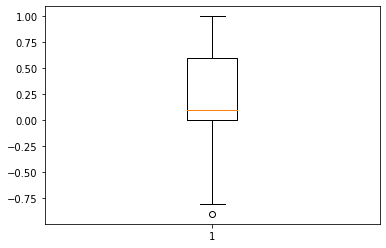

In [45]:
plt.boxplot(polarity_compare['Vader'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f827dfd3ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f827dfe1518>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f827dfe1f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f827dfe1c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f827dfd3dd8>,
  <matplotlib.lines.Line2D at 0x7f827dfe1198>]}

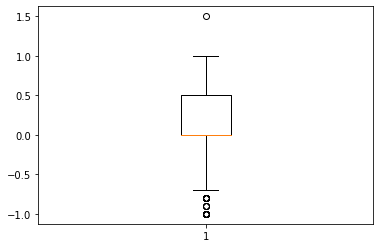

In [46]:
plt.boxplot(polarity_compare['TextBlob'])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [48]:
df_SVM = pd.DataFrame()
df_SVM.insert(0,'Original_Sentiment',df['Original_Sentiment'])
df_SVM.insert(0,'Review',df['Review'])

In [49]:
df_SVM['Review']=df_SVM['Review'].str.lower()
df_SVM['Review']=df_SVM['Review'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [50]:
X=df_SVM['Review'].to_list()
y=df_SVM['Original_Sentiment'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)
Vectorizer = TfidfVectorizer(max_df=0.9,ngram_range=(1, 2))
TfIdf=Vectorizer.fit(X_train)
X_train=TfIdf.transform(X_train)

In [52]:

model = LinearSVC(C=0.1)
model.fit(X_train,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [53]:
X_test=TfIdf.transform(X_test)
y_pred=model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.81


**Comparision between TextBlob,Vader and TFIDF- SVM:**

- Here in the above table and in analysis in box plot, I could infer from both (Textblob and Vader) sentiment identifation tools that most of the reviews are positive.

- we see from above graphs that median using vader value is 0.02, which lies on positive side, where as in TextBlob the median value is exactly on 0 which means 'Neutral'.

- As the median values of both are having minute difference lets take the frequency of Sentiment term as factor. Which I got from first question as: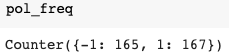
So. we see that negative as well as positive sentiment terms in corpus are nearly equal. Which means that median will be nearly neutral.

- While coming to TFIDF -SVM , we find that predicting the sentiment of sentences, we got accuracy value of 81%, which I think is low.

**Result**: Hence, By comparing all three tools, The perormance order from best to least best tool would be:

TextBlob > Vader > TFIDF - SVM

TextBlob is best among the three tools.